In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [4]:
df = load_iris()
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(df)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [7]:
X = df.data
Y = df.target

In [9]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [13]:
X.columns = df.feature_names
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
Y.columns = ['Class']

In [17]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
correlation = X.corr()

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:>

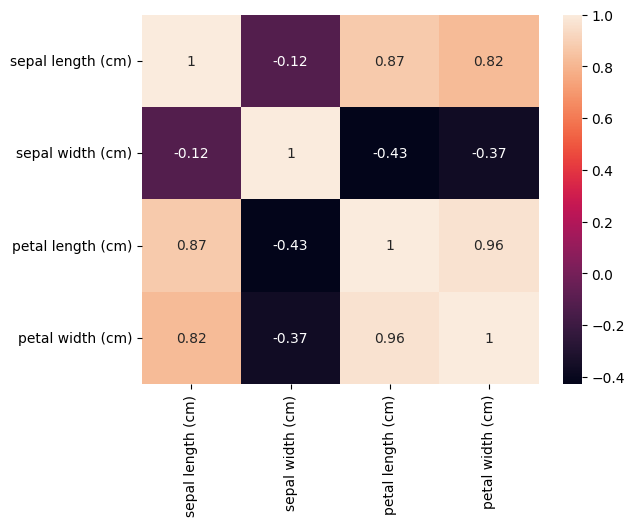

In [21]:
sns.heatmap(correlation, annot=True)

In [23]:
X.drop(columns='petal length (cm)', inplace=True)

In [24]:
X.head()

,sepal length (cm),sepal width (cm),petal width (cm)
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2


In [26]:
X.describe()

,sepal length (cm),sepal width (cm),petal width (cm)
count,150.000000,150.000000,150.000000
mean,5.843333,3.057333,1.199333
std,0.828066,0.435866,0.762238
min,4.300000,2.000000,0.100000
25%,5.100000,2.800000,0.300000
50%,5.800000,3.000000,1.300000
75%,6.400000,3.300000,1.800000
max,7.900000,4.400000,2.500000


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal width (cm)   150 non-null    float64
dtypes: float64(3)
memory usage: 3.6 KB


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    'svm' : {
        'model' : SVC(gamma='auto', probability=True),
        'params' : {
            'svc__C' : [1,10,100,100],
            'svc__kernel' : ['rbf', 'linear', 'poly', 'sigmoid']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators' : [1,3,5,100]
        }
    },
    'logistic_regression': {
        'model' : LogisticRegression(),
        'params' : {
            'logisticregression__solver' : [ 'newton-cg', 'sag', 'saga'],
            'logisticregression__C' : [1, 10, 20]
        }
    },
    'naivebayes' : {
        'model' : GaussianNB(),
        'params' : {
        }
    },
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'kneighborsclassifier__n_neighbors' : [2, 3, 4, 5]
        }
    }
}

In [41]:
scores = []
best_esmti = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model' : algo,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    best_esmti[algo] = clf.best_estimator_
df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df

c:\Users\jonua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jonua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jonua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jonua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

,model,best_score,best_params
0,svm,0.952381,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
1,random_forest,0.933333,{'randomforestclassifier__n_estimators': 100}
2,logistic_regression,0.942857,"{'logisticregression__C': 1, 'logisticregressi..."
3,naivebayes,0.923810,{}
4,knn,0.933333,{'kneighborsclassifier__n_neighbors': 3}


In [45]:
best_esmti

{'svm': Pipeline(steps=[('svc', SVC(C=1, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())]),
 'logistic_regression': Pipeline(steps=[('logisticregression',
                  LogisticRegression(C=1, solver='newton-cg'))]),
 'naivebayes': Pipeline(steps=[('gaussiannb', GaussianNB())]),
 'knn': Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])}

In [47]:
best_esmti.keys

<function dict.keys>

In [48]:
test_score = []
for i in best_esmti.keys():
    test_score.append(best_esmti[i].score(X_test, Y_test))
test_score

[0.9777777777777777, 0.9777777777777777, 1.0, 1.0, 1.0]

In [51]:
df['test_scores'] = test_score

In [52]:
df

,model,best_score,best_params,test_scores
0,svm,0.952381,"{'svc__C': 1, 'svc__kernel': 'rbf'}",0.977778
1,random_forest,0.933333,{'randomforestclassifier__n_estimators': 100},0.977778
2,logistic_regression,0.942857,"{'logisticregression__C': 1, 'logisticregressi...",1.000000
3,naivebayes,0.923810,{},1.000000
4,knn,0.933333,{'kneighborsclassifier__n_neighbors': 3},1.000000


In [49]:
final_model = best_esmti['logistic_regression']

In [50]:
final_model.score(X_test, Y_test)

1.0

In [53]:
import joblib

In [54]:
joblib.dump(final_model, "Iris_ML Model.sav")

['Iris_ML Model.sav']